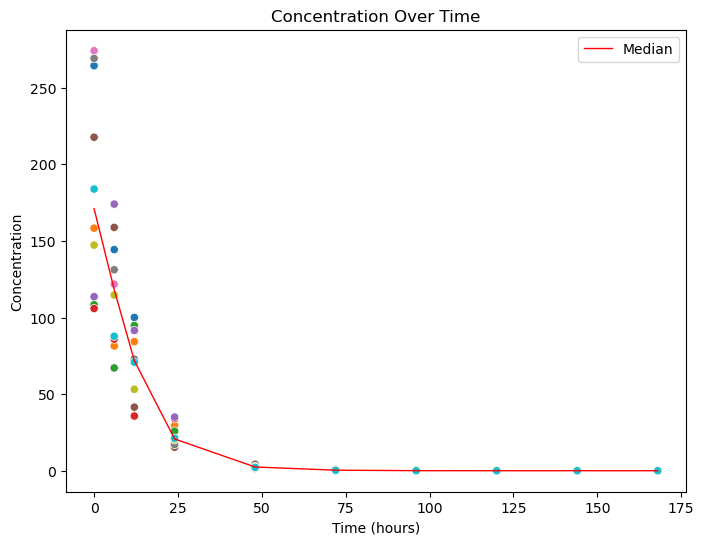

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define time and dose sequences
time_seq = np.array([0, 6, 12, 24, 48, 72, 96, 120, 144, 168])
dose_seq = np.array([100] + [0] * 9)

# Define half-life and elimination rate constant
hl = 8  # Half-life in hours
k = np.log(2) / hl  # Elimination rate constant
C0 = 100  # Initial concentration
conc_trend = np.round(C0 * np.exp(-k * time_seq), 2)

# Create dataframe
ids = np.repeat(np.arange(1, 11), 10)
times = np.tile(time_seq, 10)
trends = np.tile(conc_trend, 10)
doses = np.tile(dose_seq, 10)

# Generate concentration values
df = pd.DataFrame({
    "ID": ids,
    "TIME": times,
    "trend": trends,
    "DOSE": doses
})

df["CONC"] = np.round(df["trend"] * np.random.uniform(1, 3, size=len(df)), 2)

# Summarize data
df_summ = df.groupby("TIME")["CONC"].agg(["mean", "std", "median", "min", "max"]).reset_index()

# Plot data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="TIME", y="CONC", hue=df["ID"].astype(str), legend=False)
sns.lineplot(data=df.groupby("TIME")["CONC"].median(), color="red", linewidth=1, label="Median")
plt.xlabel("Time (hours)")
plt.ylabel("Concentration")
plt.title("Concentration Over Time")
plt.legend()
plt.show()

# Save to CSV
df.to_csv("./test_data.csv", index=False)